In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

Список признаков:

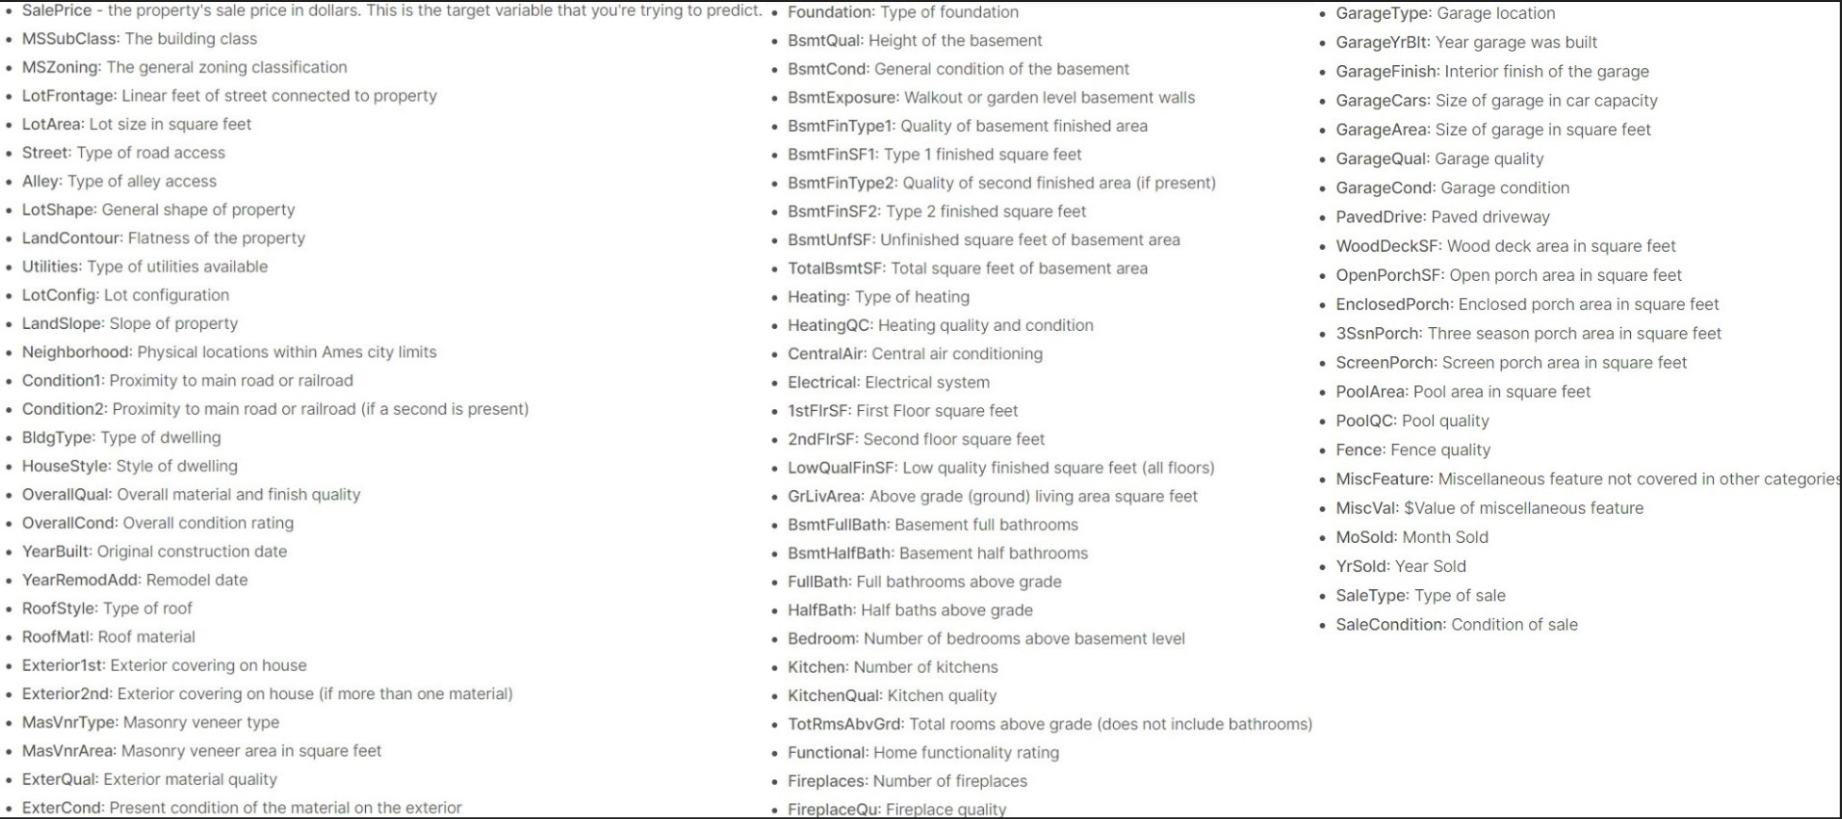

In [3]:
df = pd.read_csv('train.csv')

In [4]:
def get_basic_character(df, target):
    
    dtype = df.dtypes
    counts = df.apply(lambda x: x.count())
    Nans = df.apply(lambda x: x.isnull().sum())
    distinct = df.apply(lambda x: x.nunique())
    miss_rate = df.apply(lambda x: x.isnull().sum()/df.shape[0])
    skewn = df.skew()
    kurtosis = df.kurt()
    corr_target = df.corr()[target]
    
    cols = ['types', 'counts', 'nans', 'distinct',  'missing ration', 'skewness', 'kurtosis', 'corr_with_target']
    
    res = pd.concat([dtype, counts, Nans, distinct, miss_rate, skewn, kurtosis, corr_target], axis = 1)
    res.columns = cols
    return res

In [5]:
show_me = get_basic_character(df, 'SalePrice')
display(show_me.sort_values(by='corr_with_target', ascending=False))
pd.set_option('display.max_rows', 81)

,types,counts,nans,distinct,missing ration,skewness,kurtosis,corr_with_target
SalePrice,int64,1460,0,663,0.000000,1.882876,6.536282,1.000000
OverallQual,int64,1460,0,10,0.000000,0.216944,0.096293,0.790982
GrLivArea,int64,1460,0,861,0.000000,1.366560,4.895121,0.708624
GarageCars,int64,1460,0,5,0.000000,-0.342549,0.220998,0.640409
GarageArea,int64,1460,0,441,0.000000,0.179981,0.917067,0.623431
...,...,...,...,...,...,...,...,...
PoolQC,object,7,1453,3,0.995205,NaN,NaN,NaN
Fence,object,281,1179,4,0.807534,NaN,NaN,NaN
MiscFeature,object,54,1406,4,0.963014,NaN,NaN,NaN
SaleType,object,1460,0,9,0.000000,NaN,NaN,NaN


## We get different group of features:

Many nan-values(it proportion reach 0,47). Maybe there is need features-indicate:
* Alley
* FireplacesQu
* PoolQC
* Fence
* MiscFeature

High correlation with target feature, also as target these features have high skew and high kurtosis
* 1stFlrSF
* GrLivArea
* TotalBsmtSF

Normal correlation with target feature, also as target these features have high skew and high kurtosis:
* LotArea
* KitchenAbvGr
* ScreenPorch
* EnclosedPorch
* MasVnrArea
* OpenPorchSF
* LotFrontage
* BsmtFinSF1
* WoodDeckSF
* MSSubClass

Low correlation with target feature, also as target these features have high skew and high kurtosis:
* MiscVal
* TSsnPorch
* LowQualFinSF
* BsmtFinSF2
* BsmtHalfBa

Normal correlation with target feature, these features have low skew and low kurtosis:
* BsmtUnfSF
* 2ndFlrSF
* TotRmsAbvGrd
* HalfBath
* Fireplaces
* BsmtFullBath
* OverallQual
* BedroomAbvGr
* GarageArea
* FullBath
* GarageCars
* OverallCond

Years:
* YearRemodAdd:
* YearBuilt
* GarageYrBlt
* YrSold

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
import pylab 

Text(0.5, 1.0, 'TotalBsmtSF')

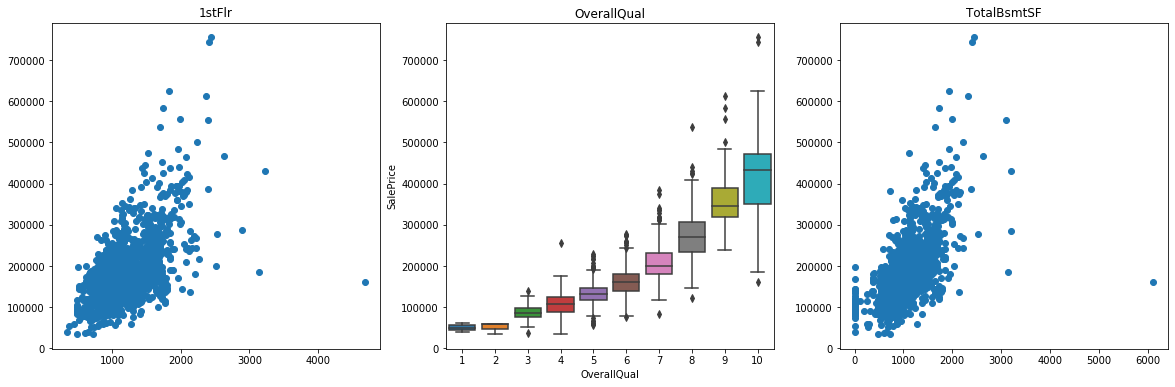

In [8]:
plt.figure(figsize = (20, 6))
pylab.subplot(131)
plt.scatter(x = df['1stFlrSF'], y = df['SalePrice'])
plt.title('1stFlr')

pylab.subplot(132)
sns.boxplot(x = df['OverallQual'], y = df['SalePrice'])
plt.title('OverallQual')

pylab.subplot(133)
plt.scatter(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.title('TotalBsmtSF')

## Rooms and living area

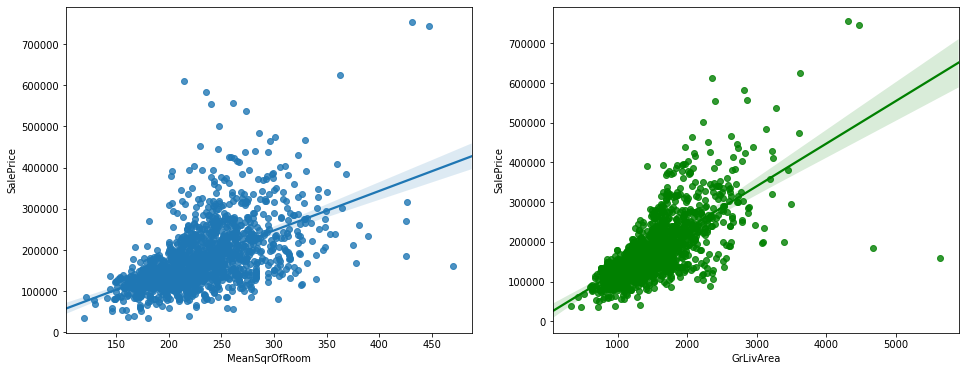

In [9]:
df['MeanSqrOfRoom'] = df.GrLivArea/df.TotRmsAbvGrd

plt.figure(figsize = (16, 6))
pylab.subplot(121)
sns.regplot(x = df['MeanSqrOfRoom'], y = df.SalePrice)

pylab.subplot(122)
sns.regplot(x = df.GrLivArea, y = df.SalePrice, color = 'green')

In [10]:
print('Corr TotRooms with SalePrice:', df.GrLivArea.corr(df.SalePrice))
print('Corr MeanSqrOfRooms with SalePrice:', df.MeanSqrOfRoom.corr(df.SalePrice))

Corr TotRooms with SalePrice: 0.7086244776126522
Corr MeanSqrOfRooms with SalePrice: 0.5406452026354331


<i>New feature has lower correlation than old feature

### Garage's features

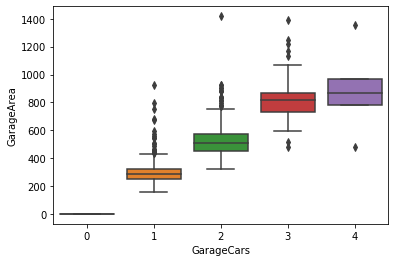

In [11]:
sns.boxplot(y = df.GarageArea, x = df.GarageCars)

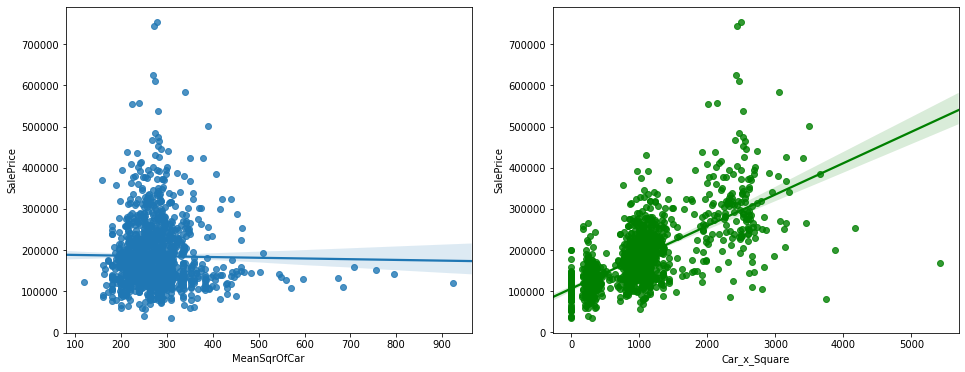

In [12]:
df['MeanSqrOfCar'] = df.GarageArea/df.GarageCars
df['Car_x_Square'] = df.GarageArea * df.GarageCars

plt.figure(figsize = (16, 6))
pylab.subplot(121)
sns.regplot(x = df['MeanSqrOfCar'], y = df.SalePrice)

pylab.subplot(122)
sns.regplot(x = df.Car_x_Square, y = df.SalePrice, color = 'green')

In [13]:
print('Corr MeanSqrOfCar with SalePrice:', df.MeanSqrOfCar.corr(df.SalePrice))
print('Corr Car_x_Square with SalePrice:', df.Car_x_Square.corr(df.SalePrice))
print('Corr GarageArea with SalePrice:', df.GarageArea.corr(df.SalePrice))

Corr MeanSqrOfCar with SalePrice: -0.013972415890944636
Corr Car_x_Square with SalePrice: 0.6800578458584324
Corr GarageArea with SalePrice: 0.6234314389183617


<i>Feature Car_x_Square has the best correlation with GarageArea, also we can see four outliers

In [14]:
df = df[df.GarageArea * df.GarageCars < 3700]

In [15]:
df.drop('MeanSqrOfCar', axis = 1, inplace = True)

## Area of first floor and area of basement

In [16]:
print('Corr Total bsmt square with square 1 floor:', df.TotalBsmtSF.corr(df['1stFlrSF']))

Corr Total bsmt square with square 1 floor: 0.8189630770679622


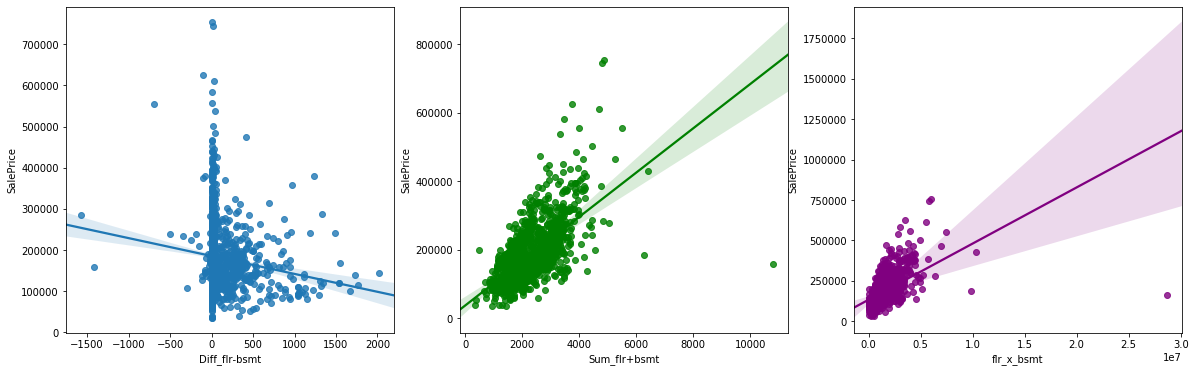

In [17]:
df['Diff_flr-bsmt'] = df['1stFlrSF'] - df.TotalBsmtSF
df['Sum_flr+bsmt'] = df['1stFlrSF'] + df.TotalBsmtSF
df['flr_x_bsmt'] = df['1stFlrSF'] * df.TotalBsmtSF

plt.figure(figsize = (20, 6))
pylab.subplot(131)
sns.regplot(x = df['Diff_flr-bsmt'], y = df.SalePrice)

pylab.subplot(132)
sns.regplot(x = df['Sum_flr+bsmt'], y = df.SalePrice, color = 'green')

pylab.subplot(133)
sns.regplot(x = df['flr_x_bsmt'], y = df.SalePrice, color = 'purple')

In [18]:
print('Corr Diff_flr-bsmt with SalePrice:', df['Diff_flr-bsmt'].corr(df.SalePrice))
print('Corr Sum_flr+bsmt with SalePrice:', df['Sum_flr+bsmt'].corr(df.SalePrice))
print('Corr flr_x_bsmt with SalePrice:', df['flr_x_bsmt'].corr(df.SalePrice))
print('Corr GarageArea with SalePrice:', df['TotalBsmtSF'].corr(df.SalePrice))
print('Corr 1stFlrSF with SalePrice:', df['1stFlrSF'].corr(df.SalePrice))

Corr Diff_flr-bsmt with SalePrice: -0.13844911124809947
Corr Sum_flr+bsmt with SalePrice: 0.639473702181418
Corr flr_x_bsmt with SalePrice: 0.5392730521538641
Corr GarageArea with SalePrice: 0.6135298143802558
Corr 1stFlrSF with SalePrice: 0.6059222859386156


In [19]:
df = df.loc[df['Sum_flr+bsmt'] < 6000]
df.drop(['Sum_flr+bsmt', 'Diff_flr-bsmt'], axis = 1, inplace = True)

<i>flr_x_bsmt has the best correlation(after deleted outliers) 

## Year of building garage and house 

In [20]:
print('Corr built-year with garage-year:', df.GarageYrBlt.corr(df['YearBuilt']))

Corr built-year with garage-year: 0.8263256222448002


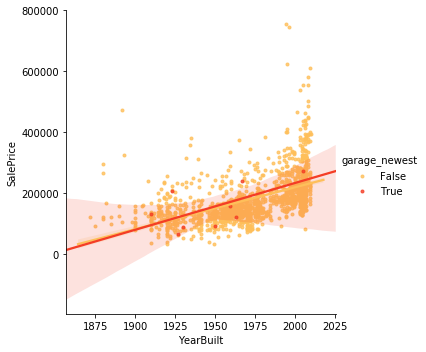

In [21]:
df['garage_newest'] = df.GarageYrBlt < df.YearBuilt
sns.lmplot(x = 'YearBuilt', y = 'SalePrice', hue = 'garage_newest', data = df, markers='.',palette = 'YlOrRd')

<i>There isnt significantly different, the changes are smooth

## Features of bathrooms

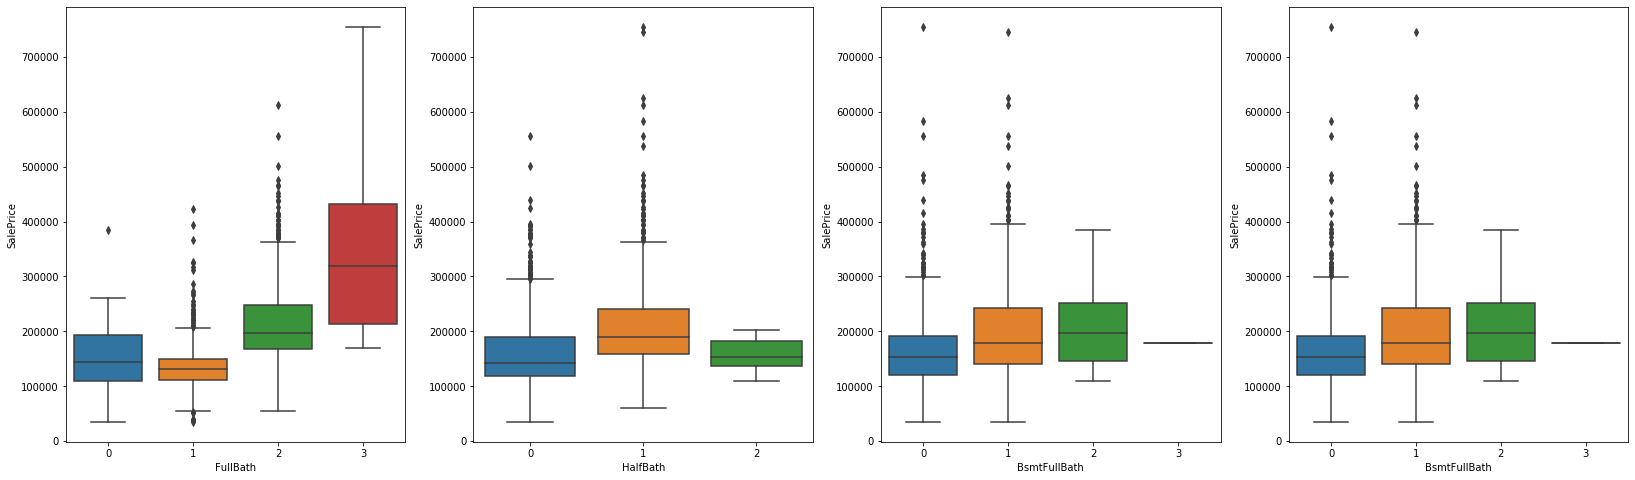

In [22]:
plt.figure(figsize = (28, 8))
pylab.subplot(141)
sns.boxplot(x = df.FullBath, y = df.SalePrice)

pylab.subplot(142)
sns.boxplot(x = df.HalfBath, y = df.SalePrice)

pylab.subplot(143)
sns.boxplot(x = df.BsmtFullBath, y = df.SalePrice)

pylab.subplot(144)
sns.boxplot(x = df.BsmtFullBath, y = df.SalePrice)

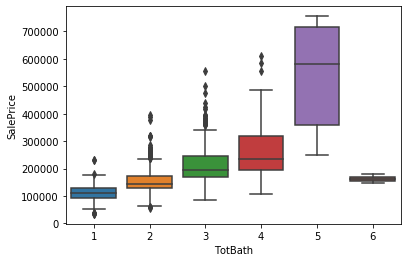

In [23]:
df['TotBath'] = df['FullBath'] + df['BsmtFullBath'] + df['HalfBath'] + df['BsmtHalfBath']
sns.boxplot(x = df['TotBath'], y = df.SalePrice)

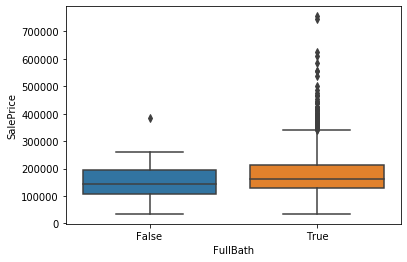

In [24]:
sns.boxplot(df.FullBath > 0, df.SalePrice)

In [25]:
df = df.loc[df.TotBath < 6]
df.TotBath.corr(df.SalePrice)

0.6256345790899689

In [26]:
df.GarageQual.isnull().sum()

79

<i>TotBath is left, other features are replaced on indicators

## Porch-features

In [27]:
df['TotalPorchSF'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
df[['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'TotalPorchSF']].describe().T

,count,mean,std,min,25%,50%,75%,max
OpenPorchSF,1451.0,46.292901,65.415523,0.0,0.0,25.0,68.0,547.0
3SsnPorch,1451.0,3.430737,29.406940,0.0,0.0,0.0,0.0,508.0
EnclosedPorch,1451.0,21.889731,60.878173,0.0,0.0,0.0,0.0,552.0
ScreenPorch,1451.0,15.154376,55.917522,0.0,0.0,0.0,0.0,480.0
WoodDeckSF,1451.0,93.971054,125.146432,0.0,0.0,0.0,168.0,857.0
TotalPorchSF,1451.0,180.738801,155.721431,0.0,45.0,164.0,265.0,1027.0


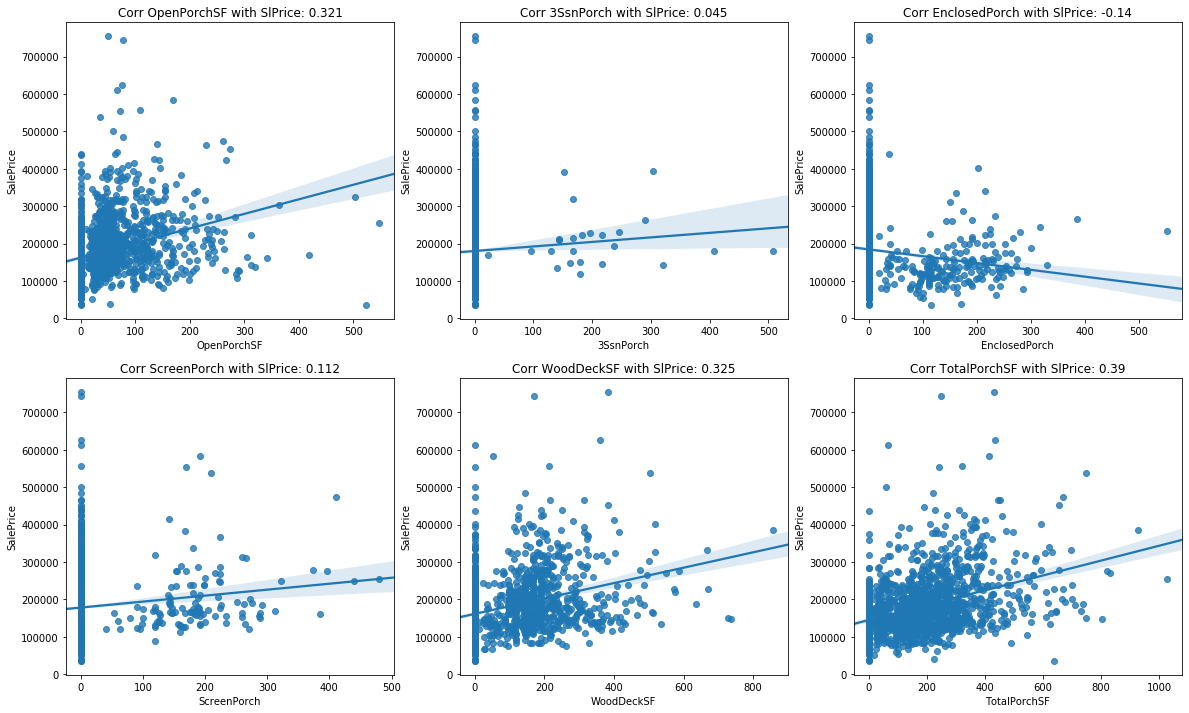

In [28]:
i = 1
plt.figure(figsize = (20, 12))
for x in df[['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'TotalPorchSF']].columns:
    pylab.subplot(2, 3, i)
    sns.regplot(x = df[x], y = df.SalePrice)
    plt.title('Corr {0} with SlPrice: {1}'.format(x, str(round(df[x].corr(df.SalePrice), 3))))
    i += 1

<i>As we can observe, significant part each feature equals zero. We can replace these features on features-indicators (original features have low correlation)

In [29]:
df.rename(columns = {'3SsnPorch': 'ThrSsnPorch'}, inplace = True)

df.OpenPorchSF = df.OpenPorchSF > 0
df.EnclosedPorch =  df.EnclosedPorch > 0
df.ThrSsnPorch = df.ThrSsnPorch > 0
df.ScreenPorch = df.ScreenPorch > 0
df.WoodDeckSF = df.WoodDeckSF > 0

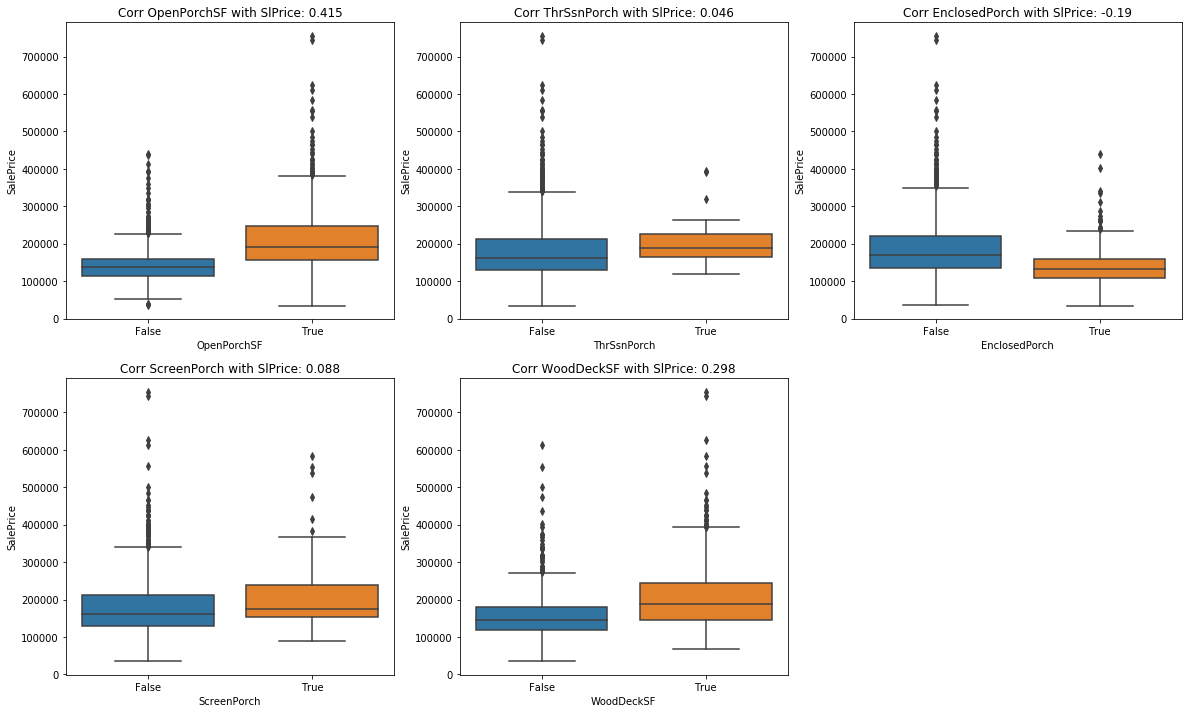

In [30]:
i = 1
plt.figure(figsize = (20, 12))
for x in df[['OpenPorchSF', 'ThrSsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF']].columns:
    pylab.subplot(2, 3, i)
    sns.boxplot(x = df[x], y = df.SalePrice)
    plt.title('Corr {0} with SlPrice: {1}'.format(x, str(round(df[x].corr(df.SalePrice), 3))))
    i += 1

## Slope of Lotarea's surface 

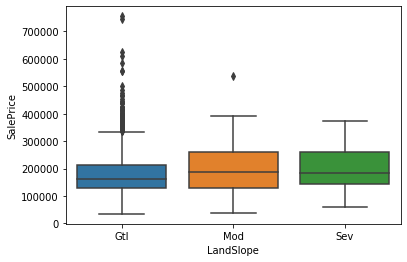

In [31]:
sns.boxplot(df.LandSlope, df.SalePrice)

In [32]:
coef_slope = {'Gtl': 1, 'Mod': 0.5, 'Sev': 0.25}
df.LandSlope = df.LandSlope.map(coef_slope)
df['Approx_LotArea'] = df.LotArea * df.LandSlope

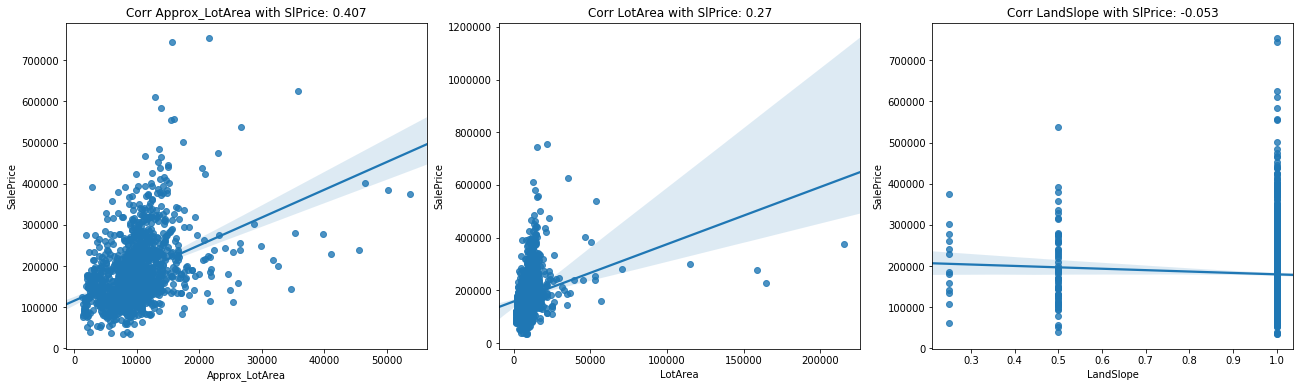

In [33]:
plt.figure(figsize = (22, 6))
i = 1
for x in df[['Approx_LotArea', 'LotArea', 'LandSlope']].columns:
    pylab.subplot(1,3,i)
    sns.regplot(x = df[x], y = df.SalePrice)
    plt.title('Corr {0} with SlPrice: {1}'.format(x, str(round(df[x].corr(df.SalePrice), 3))))
    i += 1

<i>We can observe few outliers in lotArea

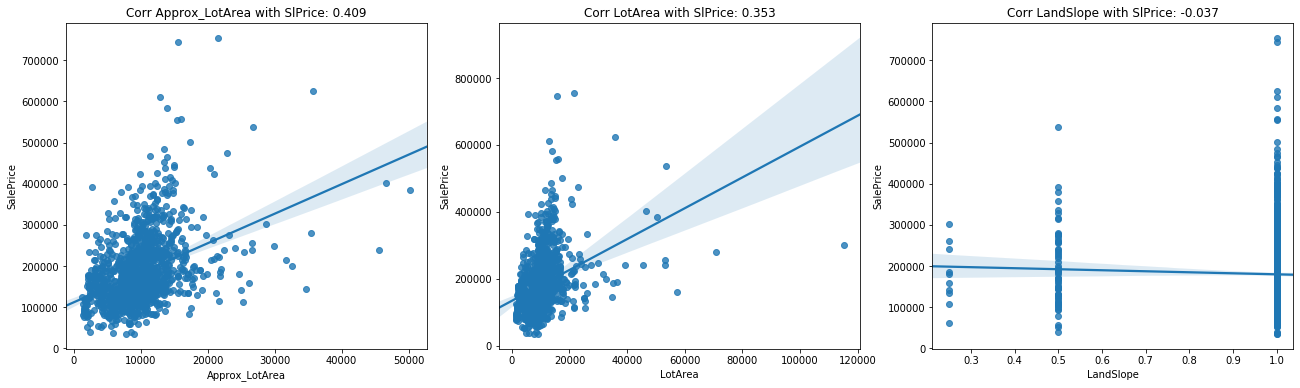

In [34]:
df = df.loc[df.LotArea < 150000]
plt.figure(figsize = (22, 6))
i = 1
for x in df[['Approx_LotArea', 'LotArea', 'LandSlope']].columns:
    pylab.subplot(1,3,i)
    sns.regplot(x = df[x], y = df.SalePrice)
    plt.title('Corr {0} with SlPrice: {1}'.format(x, str(round(df[x].corr(df.SalePrice), 3))))
    i += 1

## Features of years

In [35]:
list_year = [x for x in df.columns if 'Year' in x]
list_year

['YearBuilt', 'YearRemodAdd']

In [36]:
df[list_year].describe()

,YearBuilt,YearRemodAdd
count,1448.000000,1448.000000
mean,1971.267956,1984.851519
std,30.197576,20.649694
min,1872.000000,1950.000000
25%,1954.000000,1967.000000
50%,1973.000000,1994.000000
75%,2000.000000,2004.000000
max,2010.000000,2010.000000


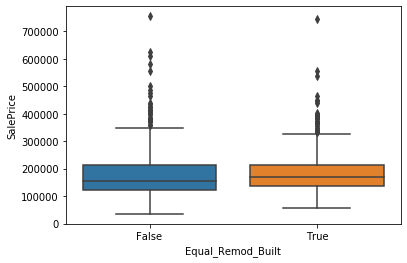

In [37]:
a = df[list_year].apply(lambda x: 2011 - x)
a['Equal_Remod_Built'] = df.YearRemodAdd == df.YearBuilt
a['SalePrice'] = df.SalePrice
sns.boxplot(a['Equal_Remod_Built'], a['SalePrice'])

# Target feature

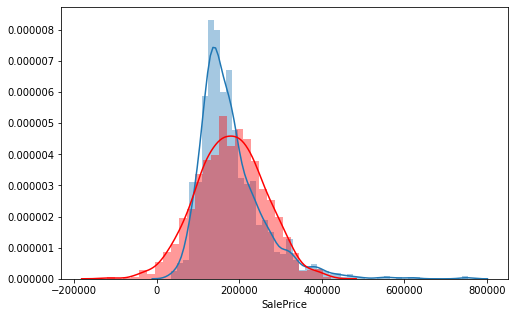

In [38]:
plt.figure(figsize = (8, 5))
sns.distplot(df.SalePrice)

l, sc = stats.norm.fit(df.SalePrice)
sns.distplot(stats.norm.rvs(loc = l, scale=sc, size = len(df.SalePrice)), color = 'red')

In [39]:
print('Shapiro-Wilk test for the original sample, p-value for H0:', stats.shapiro(df.SalePrice)[1])

Shapiro-Wilk test for the original sample, p-value for H0: 3.5106568577429636e-33


<i>The normality hypothesis is confidently rejected

-0.07725018393051739


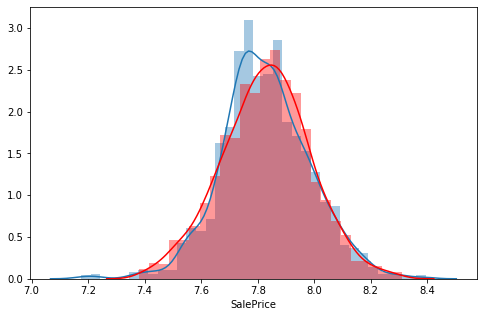

In [97]:
df.SalePrice, p = stats.boxcox(df.SalePrice)
print(p)
plt.figure(figsize = (8, 5))
sns.distplot(df.SalePrice)
l, sc = stats.norm.fit(df.SalePrice)
sns.distplot(stats.norm.rvs(loc = l, scale=sc, size = len(df.SalePrice)), color = 'red')

Skew: -0.008827624435685397 
Kurtosis: 0.893001628885052


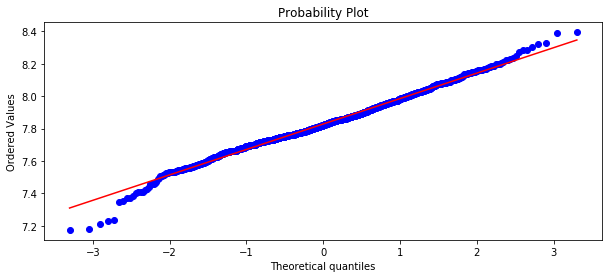

In [40]:
plt.figure(figsize = (10, 4))
res = stats.probplot(df.SalePrice, plot = plt)
print('Skew:', df.SalePrice.skew(), '\nKurtosis:', df.SalePrice.kurt())

### New feature - total area of building

In [41]:
df['TotalConstructArea'] = df.TotalBsmtSF + df.GrLivArea + df.MasVnrArea.fillna(0) + df.GarageArea + df.PoolArea.fillna(0) + df.TotalPorchSF
df.TotalConstructArea.corr(df.SalePrice)

0.8498423735810686

<i>That feature has a high correlation with target feature

In [49]:
df.to_csv('new_train.csv')

In [50]:
show_me = get_basic_character(df, 'SalePrice')
display(show_me.sort_values(by='corr_with_target', ascending=False))
pd.set_option('display.max_rows', 93)

,types,counts,nans,distinct,missing ration,skewness,kurtosis,corr_with_target
SalePrice,float64,1448,0,657,0.0,-0.008828,0.893002,1.000000
TotalConstructArea,float64,1448,0,1178,0.0,0.842755,1.466846,0.849842
OverallQual,int64,1448,0,10,0.0,0.203446,0.084285,0.821596
GrLivArea,int64,1448,0,852,0.0,1.014143,2.108663,0.720227
Car_x_Square,int64,1448,0,483,0.0,1.054445,1.073321,0.697359
...,...,...,...,...,...,...,...,...
PoolQC,object,1448,0,4,0.0,NaN,NaN,NaN
Fence,object,1448,0,5,0.0,NaN,NaN,NaN
MiscFeature,object,1448,0,5,0.0,NaN,NaN,NaN
SaleType,object,1448,0,9,0.0,NaN,NaN,NaN
